In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [2]:
#Importing the data set
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [3]:
df.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.3352,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.4342,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [4]:
df.shape

(907, 27)

In [5]:
# Checking the null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

We have many null values in the dataset, which we need to fill before proceeding.

In [7]:
# filling the null values
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [8]:
# filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)

In [9]:
# Rechecking the null values
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
other_fuel2                 0
other_fuel3                 0
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source          0
wepp_id                     0
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_gwh_2019         0
generation_data_source      0
estimated_generation_gwh    0
dtype: int64

In [10]:
# Checking the unique values
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   4
other_fuel2                   2
other_fuel3                   1
commissioning_year           74
owner                       281
source                      191
url                         304
geolocation_source            3
wepp_id                       1
year_of_capacity_data         2
generation_gwh_2013           1
generation_gwh_2014         372
generation_gwh_2015         397
generation_gwh_2016         404
generation_gwh_2017         409
generation_gwh_2018         411
generation_gwh_2019           1
generation_data_source        2
estimated_generation_gwh      1
dtype: int64

In [11]:
# Statistical Summary
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,907.000000,907.000000,9.070000e+02,907.000000,9.070000e+02,907.000000,9.070000e+02,907.000000,907.000000,907.000000,907.000000,907.000000,9.070000e+02,9.070000e+02
mean,326.223755,23.125256,76.538572,5.920000e+01,1185.185226,5.920000e+01,1180.629107,5.920000e+01,1100.329205,1161.437454,1211.781915,1266.439354,1314.589897,5.920000e+01,5.920000e+01
std,590.085456,10.322840,6.263960,8.246843e-13,956.750996,8.246843e-13,970.160420,8.246843e-13,2914.072352,3094.143089,3119.562531,3175.490873,3286.682207,8.246843e-13,8.246843e-13
min,0.000000,8.168900,59.200000,5.920000e+01,59.200000,5.920000e+01,59.200000,5.920000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,5.920000e+01,5.920000e+01
25%,16.725000,17.072000,73.811550,5.920000e+01,59.200000,5.920000e+01,59.200000,5.920000e+01,59.200000,59.200000,59.200000,59.200000,59.200000,5.920000e+01,5.920000e+01
50%,59.200000,22.142100,76.493800,5.920000e+01,1978.000000,5.920000e+01,2019.000000,5.920000e+01,59.200000,59.200000,59.200000,59.200000,59.200000,5.920000e+01,5.920000e+01
75%,385.250000,26.753750,79.206100,5.920000e+01,2003.000000,5.920000e+01,2019.000000,5.920000e+01,556.562750,598.926350,670.039394,709.290725,687.754000,5.920000e+01,5.920000e+01
max,4760.000000,59.200000,95.408000,5.920000e+01,2018.000000,5.920000e+01,2019.000000,5.920000e+01,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,5.920000e+01,5.920000e+01


In [12]:
# Dropping unrequired columns
df.drop(['name','url','year_of_capacity_data', 'country','country_long','gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['primary_fuel'] = le.fit_transform(df['primary_fuel'])
df['geolocation_source'] = le.fit_transform(df['geolocation_source'])
df['source'] = le.fit_transform(df['source'])

In [14]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,source,geolocation_source,wepp_id,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
0,2.5,28.1839,73.2407,6,59.2,59.2,59.2,2011.0,109,1,59.2,59.2,59.200000,59.200000,59.200000,59.200000,59.200000,59.2,59.2
1,98.0,24.7663,74.6090,1,59.2,59.2,59.2,59.2,174,2,59.2,59.2,59.200000,59.200000,59.200000,59.200000,59.200000,59.2,59.2
2,39.2,21.9038,69.3732,7,59.2,59.2,59.2,59.2,21,2,59.2,59.2,59.200000,59.200000,59.200000,59.200000,59.200000,59.2,59.2
3,135.0,23.8712,91.3602,2,59.2,59.2,59.2,2004.0,22,2,59.2,59.2,617.789264,843.747000,886.004428,663.774500,626.239128,59.2,59.2
4,1800.0,21.9603,82.4091,1,Oil,59.2,59.2,2015.0,22,2,59.2,59.2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,59.2,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,Oil,59.2,59.2,2016.0,22,2,59.2,59.2,59.200000,0.994875,233.596650,865.400000,686.500000,59.2,59.2
903,3.0,12.8932,78.1654,6,59.2,59.2,59.2,59.2,77,0,59.2,59.2,59.200000,59.200000,59.200000,59.200000,59.200000,59.2,59.2
904,25.5,15.2758,75.5811,7,59.2,59.2,59.2,59.2,21,2,59.2,59.2,59.200000,59.200000,59.200000,59.200000,59.200000,59.2,59.2
905,80.0,24.3500,73.7477,1,59.2,59.2,59.2,59.2,59,2,59.2,59.2,59.200000,59.200000,59.200000,59.200000,59.200000,59.2,59.2


In [15]:
# Dropping unnecessary columns and even the columns which are not correlated
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2','source','generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)

In [16]:
# Checking Correlation
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,-0.053917,0.216974,-0.380395,0.414775,0.204865,0.814674,0.841468,0.875369,0.892899,0.905488
latitude,-0.053917,1.000000,-0.500920,0.096464,0.088458,-0.034872,-0.029067,-0.030007,-0.031473,-0.024888,-0.028212
longitude,0.216974,-0.500920,1.000000,-0.348476,0.294825,0.135529,0.160584,0.170438,0.186348,0.199703,0.199273
primary_fuel,-0.380395,0.096464,-0.348476,1.000000,-0.481713,-0.483217,-0.282791,-0.288032,-0.300822,-0.310594,-0.312084
commissioning_year,0.414775,0.088458,0.294825,-0.481713,1.000000,0.450920,0.304853,0.304534,0.316274,0.325603,0.327190
geolocation_source,0.204865,-0.034872,0.135529,-0.483217,0.450920,1.000000,0.140931,0.140519,0.145740,0.149963,0.150669
generation_gwh_2014,0.814674,-0.029067,0.160584,-0.282791,0.304853,0.140931,1.000000,0.966673,0.937892,0.907541,0.898658
generation_gwh_2015,0.841468,-0.030007,0.170438,-0.288032,0.304534,0.140519,0.966673,1.000000,0.974653,0.943781,0.936566
generation_gwh_2016,0.875369,-0.031473,0.186348,-0.300822,0.316274,0.145740,0.937892,0.974653,1.000000,0.976306,0.967607
generation_gwh_2017,0.892899,-0.024888,0.199703,-0.310594,0.325603,0.149963,0.907541,0.943781,0.976306,1.000000,0.988031


<AxesSubplot:>

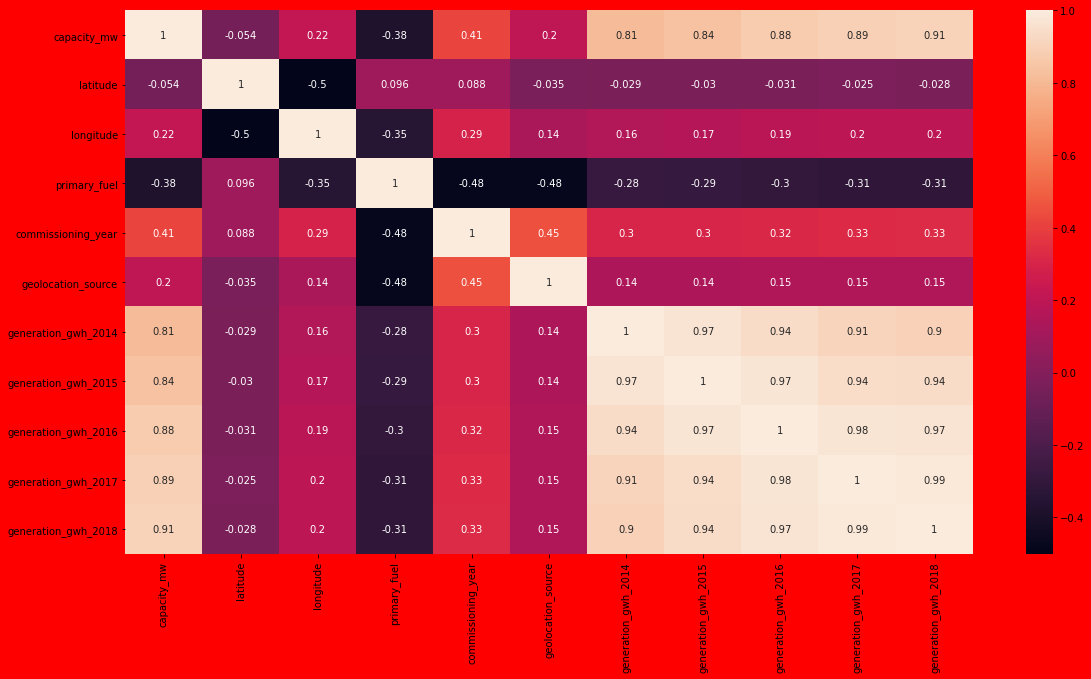

In [18]:
# Plotting correlation heatmap
plt.figure(figsize=[19,10],facecolor='red')
sns.heatmap(df.corr(),annot=True)

Here, we can see generation_growth_2014, 2015, 2016, 2017, 2018 are highly correlated.

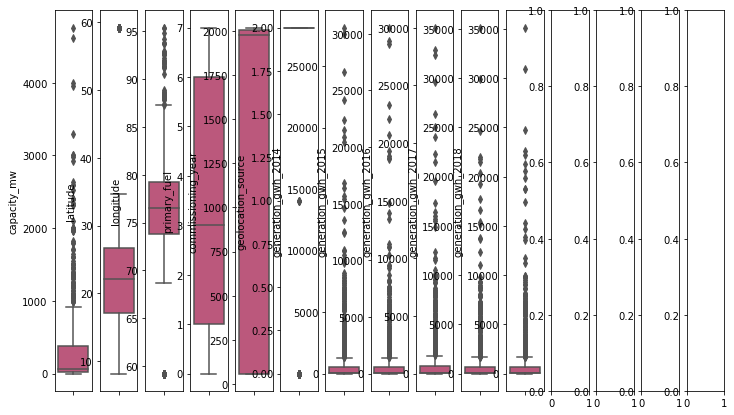

In [19]:
# Checking Outliers
fig, ax = plt.subplots(ncols=15, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.9, h_pad=5.0)
plt.show()

Many columns are having the outliers, which we need to handle properly.

In [20]:
# Removing outliers
from scipy.stats import zscore
zs=np.abs(zscore(df))
zs

array([[0.54890755, 0.49031418, 0.52677407, ..., 0.36967293, 0.38038384,
        0.3821734 ],
       [0.38697729, 0.15905982, 0.30821347, ..., 0.36967293, 0.38038384,
        0.3821734 ],
       [0.48667885, 0.1183909 , 1.14453562, ..., 0.36967293, 0.38038384,
        0.3821734 ],
       ...,
       [0.50990864, 0.76081653, 0.15293848, ..., 0.36967293, 0.38038384,
        0.3821734 ],
       [0.41749818, 0.11870952, 0.4457902 , ..., 0.36967293, 0.38038384,
        0.3821734 ],
       [0.52516908, 1.27853715, 0.14986451, ..., 0.36967293, 0.38038384,
        0.3821734 ]])

In [22]:
threshold=3
print(np.where(zs>3))

(array([ 14,  15,  15,  15,  15,  15,  25,  42,  45,  67,  72, 143, 143,
       143, 143, 143, 143, 147, 158, 178, 192, 201, 208, 209, 209, 209,
       209, 209, 209, 250, 308, 308, 308, 308, 308, 308, 329, 330, 332,
       333, 363, 364, 364, 364, 364, 364, 364, 375, 386, 420, 422, 430,
       435, 440, 466, 478, 479, 482, 482, 483, 493, 493, 493, 493, 493,
       493, 494, 494, 494, 494, 494, 494, 502, 519, 532, 538, 540, 545,
       623, 648, 648, 648, 648, 648, 648, 655, 657, 657, 657, 657, 657,
       657, 674, 680, 695, 695, 695, 695, 695, 695, 705, 711, 712, 721,
       721, 721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726,
       726, 726, 731, 732, 741, 767, 770, 773, 774, 775, 776, 784, 786,
       786, 786, 786, 786, 786, 788, 808, 808, 808, 808, 808, 808, 828,
       880, 880, 880, 880, 880, 880, 884, 886], dtype=int64), array([ 1,  0,  7,  8,  9, 10,  1,  1,  1,  1,  1,  0,  6,  7,  8,  9, 10,
        0,  6,  1,  1,  1,  1,  0,  6,  7,  8,  9, 10,  1,  0,  6,  7,

In [25]:
zs[6][8]

0.3689604664398681

In [27]:
df_new=df[(zs<3).all(axis=1)]
df_new

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,1,59.200000,59.200000,59.200000,59.200000,59.200000
1,98.0,24.7663,74.6090,1,59.2,2,59.200000,59.200000,59.200000,59.200000,59.200000
2,39.2,21.9038,69.3732,7,59.2,2,59.200000,59.200000,59.200000,59.200000,59.200000
3,135.0,23.8712,91.3602,2,2004.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,2,59.200000,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,59.2,0,59.200000,59.200000,59.200000,59.200000,59.200000
904,25.5,15.2758,75.5811,7,59.2,2,59.200000,59.200000,59.200000,59.200000,59.200000
905,80.0,24.3500,73.7477,1,59.2,2,59.200000,59.200000,59.200000,59.200000,59.200000


In [28]:
df_new.shape

(834, 11)

In [29]:
# Checking the percentage of loss data
loss_percent =(907-834)/907*100
print(loss_percent)

8.04851157662624


In [30]:
# Checking the skewness
df.skew()

capacity_mw            3.123576
latitude               1.940249
longitude             -0.295883
primary_fuel           0.472251
commissioning_year    -0.328473
geolocation_source    -2.159841
generation_gwh_2014    5.018549
generation_gwh_2015    5.292321
generation_gwh_2016    5.014692
generation_gwh_2017    5.010509
generation_gwh_2018    4.874039
dtype: float64

we can see skewness in generation_growth_2014, 2015,2016,2017,2018. will remove the skewness now.

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

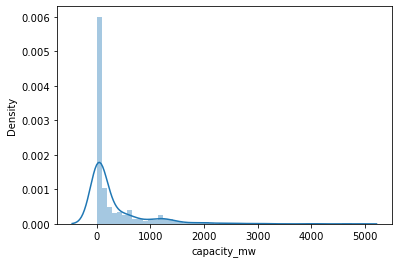

In [32]:
sns.distplot(df['capacity_mw'])

<AxesSubplot:xlabel='latitude', ylabel='Density'>

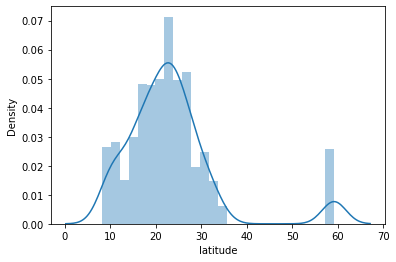

In [33]:
sns.distplot(df['latitude'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

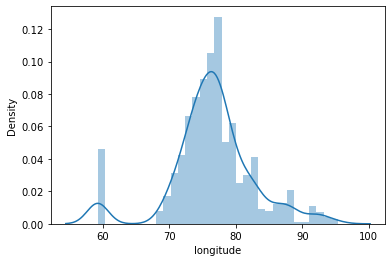

In [34]:
sns.distplot(df['longitude'])

<AxesSubplot:xlabel='primary_fuel', ylabel='Density'>

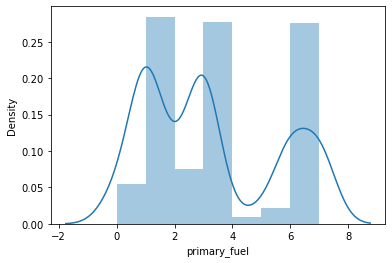

In [35]:
sns.distplot(df['primary_fuel'])

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

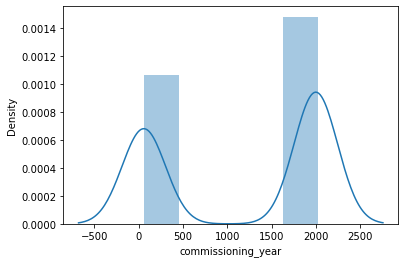

In [36]:
sns.distplot(df['commissioning_year'])

<AxesSubplot:xlabel='geolocation_source', ylabel='Density'>

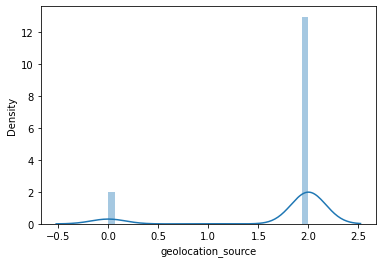

In [37]:
sns.distplot(df['geolocation_source'])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

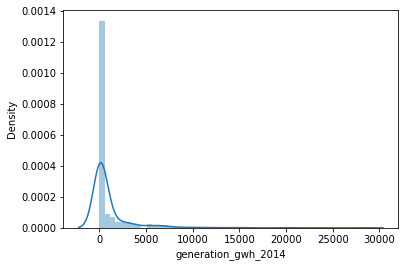

In [38]:
sns.distplot(df['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

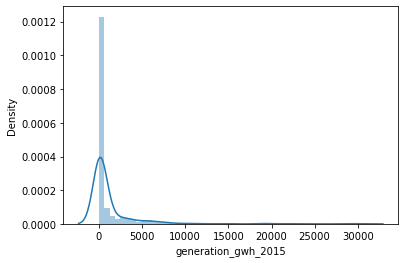

In [39]:
sns.distplot(df['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

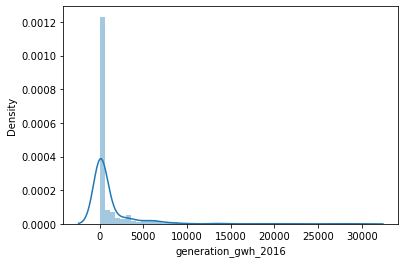

In [40]:
sns.distplot(df['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

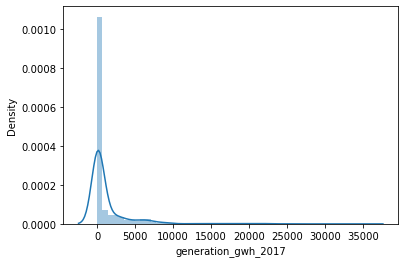

In [41]:
sns.distplot(df['generation_gwh_2017'])

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

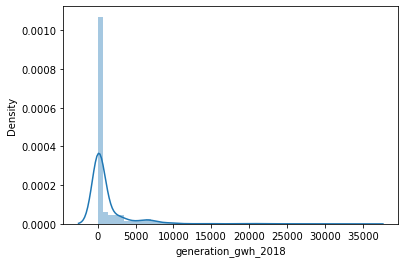

In [42]:
sns.distplot(df['generation_gwh_2018'])

Here, we can see from the above graphs that most of the graphs are bimodal and also having the skewness.

In [44]:
# Removing skewness
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']] = scaler.fit_transform(df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']].values)

In [45]:
# Rechecking the skewness
df.skew()

capacity_mw            3.123576
latitude               1.940249
longitude             -0.295883
primary_fuel           0.472251
commissioning_year    -0.328473
geolocation_source    -2.159841
generation_gwh_2014   -0.025038
generation_gwh_2015   -0.021906
generation_gwh_2016   -0.017326
generation_gwh_2017   -0.010751
generation_gwh_2018   -0.005868
dtype: float64

In [46]:
scaler = PowerTransformer(method='yeo-johnson')
df[['capacity_mw','latitude']] = scaler.fit_transform(df[['capacity_mw','latitude']].values)

In [47]:
df.skew()

capacity_mw            0.022164
latitude              -0.012773
longitude             -0.295883
primary_fuel           0.472251
commissioning_year    -0.328473
geolocation_source    -2.159841
generation_gwh_2014   -0.025038
generation_gwh_2015   -0.021906
generation_gwh_2016   -0.017326
generation_gwh_2017   -0.010751
generation_gwh_2018   -0.005868
dtype: float64

now there is no skewness in the data.

# Model 1 :

Taeget Variable - capacity_mw

In [49]:
# Splitting the dataset
y = df_new['capacity_mw']
x = df_new.drop(columns=['capacity_mw'], axis=1)

In [50]:
# Scaling the data
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.113793,-0.844329,1.229731,0.897032,-1.012660,-0.444704,-0.458054,-0.465659,-0.474040,-0.473770
1,0.571325,-0.562462,-0.971118,-1.133446,0.413959,-0.444704,-0.458054,-0.465659,-0.474040,-0.473770
2,0.116967,-1.641027,1.669901,-1.133446,0.413959,-0.444704,-0.458054,-0.465659,-0.474040,-0.473770
3,0.429248,2.888254,-0.530948,0.889750,0.413959,-0.106459,0.008590,0.007741,-0.139850,-0.168949
4,0.125935,1.044344,-0.971118,0.901194,0.413959,1.357578,3.025757,3.074972,2.470218,3.407351
...,...,...,...,...,...,...,...,...,...,...
829,-0.773321,0.003580,-0.971118,0.902234,0.413959,-0.444704,-0.492674,-0.365806,-0.028398,-0.136555
830,-1.313266,0.170150,1.229731,-1.133446,-2.439279,-0.444704,-0.458054,-0.465659,-0.474040,-0.473770
831,-0.935081,-0.362211,1.669901,-1.133446,0.413959,-0.444704,-0.458054,-0.465659,-0.474040,-0.473770
832,0.505247,-0.739888,-0.971118,-1.133446,0.413959,-0.444704,-0.458054,-0.465659,-0.474040,-0.473770


In [52]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state =45)

In [53]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
lr_pred = lr.predict(x_test)

0.7877349009439729


In [55]:
from sklearn.metrics import mean_absolute_error
print('MSE:',mean_squared_error(lr_pred,y_test))
print('MAE:',mean_absolute_error(lr_pred,y_test))
print('r2_score:',r2_score(lr_pred,y_test))

MSE: 72410.78478211354
MAE: 153.25812548683487
r2_score: 0.5386436052137442


In [56]:
# Using SGD regressor
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.6592310700065932
MSE: 71213.01265541068
MAE: 152.39503787385988
RMSE: 266.8576636625051


In [60]:
# Using LASSO
from sklearn.linear_model import Lasso,Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 1, 'random_state': 0}


In [61]:
ls=Lasso()
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
ls_predict=ls.predict(x_test)

0.7876258451499726


In [62]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.6528838603290408
MSE: 72539.43617384243
MAE: 152.66276826002652
RMSE: 269.33146153734515


In [63]:
# Using RIDGE
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'saga'}


In [64]:
from sklearn.linear_model import Ridge

rd=Ridge()
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))
rd_predict=rd.predict(x_test)

0.7877107133956428


In [65]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.6588726164574186
MSE: 71287.92135420036
MAE: 151.81444335686294
RMSE: 266.99798005640486


In [66]:
# Using Random forest 
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
rf_pred=rf.predict(x_test)

0.9762278849572157


In [67]:
print('MSE:',mean_squared_error(rf_pred,y_test))
print('MAE:',mean_absolute_error(rf_pred,y_test))
print('r2_score:',r2_score(rf_pred,y_test))

MSE: 60791.74054074838
MAE: 116.1767076494024
r2_score: 0.6261853557566974


In [68]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Lasso(),
             Ridge(),
             RandomForestRegressor(),]
             
             

names = ['LR','L','R','RF',]

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 48878.230320, 26357.211632
L    : 48696.477468, 26614.982062
R    : 48766.497320, 26336.147121
RF    : 39788.340359, 25092.261911


In [69]:
# Hypertuning
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [70]:
rf1=RandomForestRegressor()
rf_randomized=RandomizedSearchCV(estimator=rf1,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [71]:
rf_randomized.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=100, verbose=2)

In [72]:
rf_randomized.best_params_

{'n_estimators': 822,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [74]:
rf_final=rf_randomized.best_estimator_

In [75]:
y_pred_random=rf_final.predict(x_test)

Hence, we can see that Random Forest gives us the best accuracy score of 97 %

In [78]:
# Saving the model
import pickle
file = 'GLOBAL POWER PLANT CAPACITY_MW.pkl'
#save file
save = pickle.dump(RandomForestRegressor,open(file,'wb'))

In [79]:
# Conclusion
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a, "predicted":predicted}, index=range(len(a)))
df_com

,original,predicted
0,49.00,5.286287
1,6.25,-8.806058
2,610.00,516.626226
3,500.00,734.301696
4,1000.00,1162.457591
...,...,...
246,27.30,17.787332
247,400.00,491.726152
248,25.00,147.976554
249,11.20,30.994465


# Model 2 - 

Target Variable - Primary_fuel


In [80]:
y = df_new['primary_fuel']
x = df_new.drop(columns=['primary_fuel'], axis=1)

In [81]:
maxaccu = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxaccu:
        maxaccu = acc
        maxRS = i
print ('Max Accuracy is', maxaccu, 'on Random State', maxRS)

Max Accuracy is 0.6414342629482072 on Random State 296


In [82]:
#Splitting data into train test split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 296)

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
LR = LogisticRegression()

# feeding the training set into the model
LR.fit(x_train, y_train)

# predicting the results for the test set
y_pred = LR.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", LR.score(x_train, y_train))
print("Testing accuracy :", LR.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.5951972555746141
Testing accuracy : 0.6414342629482072
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.80      0.52      0.63        71
           2       0.00      0.00      0.00        20
           3       0.77      0.92      0.84        78
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.68      0.76      0.71        33
           7       0.42      0.84      0.56        32

    accuracy                           0.64       251
   macro avg       0.33      0.38      0.34       251
weighted avg       0.61      0.64      0.61       251

[[ 0  0  0  0  0  0  3  9]
 [ 0 37  5 10  0  2  4 13]
 [ 0  2  0 10  0  1  0  7]
 [ 0  6  0 72  0  0  0  0]
 [ 0  1  1  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  2]
 [ 0  0  0  1  0  0 25  7]
 [ 0  0  0  0  0  0  5 27]]


In [84]:
# USING DECISION TREE
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.796812749003984


In [85]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.73      0.79      0.76        71
           2       0.35      0.30      0.32        20
           3       0.93      0.86      0.89        78
           4       0.00      0.00      0.00         3
           5       0.14      0.50      0.22         2
           6       1.00      1.00      1.00        33
           7       0.88      0.94      0.91        32

    accuracy                           0.80       251
   macro avg       0.61      0.62      0.60       251
weighted avg       0.81      0.80      0.80       251

[[ 7  4  0  0  0  0  0  1]
 [ 1 56  7  3  3  1  0  0]
 [ 0  7  6  2  0  3  0  2]
 [ 0  7  3 67  0  1  0  0]
 [ 0  1  0  0  0  1  0  1]
 [ 0  0  1  0  0  1  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  2  0  0  0  0  0 30]]


In [86]:
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge

np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         RandomForestRegressor(),
         DecisionTreeRegressor(),]

names = ['LR','RF','DTR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 3.295060, 0.388567
RF   : 1.454919, 0.422454
DTR   : 3.307243, 0.945829


In [87]:
# Hypertuning
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [88]:
rf1=RandomForestRegressor()
rf_randomized=RandomizedSearchCV(estimator=rf1,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [89]:
rf_randomized.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=100, verbose=2)

In [90]:
rf_randomized.best_params_

{'n_estimators': 822,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [91]:
rf_final=rf_randomized.best_estimator_

In [92]:
y_pred_random=rf_final.predict(x_test)

Hence, we can see that Random Forest gives us the best accuracy score of 88 %

In [93]:
# Saving The model
import pickle
file = 'GLOBAL POWER PLANT PRIMARY_FUEL.pkl'
#save file
save = pickle.dump(RandomForestRegressor,open(file,'wb'))

In [94]:
# Conclusion
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a, "predicted":predicted}, index=range(len(a)))
df_com

,original,predicted
0,3,331291.843123
1,6,21421.552133
2,3,267378.389955
3,1,633165.623206
4,1,138941.168048
...,...,...
246,3,144914.444313
247,3,127099.758072
248,3,203479.612668
249,2,124117.120055
